# Problem 4

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
from torchvision import datasets

In [3]:
from six.moves import urllib    
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

## Load Data

In [4]:
# ##################################
# import data
# ##################################
# download the MNIST dataset
mnist_trainset = datasets.MNIST(root='data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='data', train=False, download=True, transform=None)


In [5]:

# separate into data and labels
# training data
# reducing training dataset to 1000 points and test dataset to 2000 points in order to
# create an overfitting model on which to study regularization

train_data = mnist_trainset.data.to(dtype=torch.float32)[:1000]
train_data = train_data.reshape(-1, 784)
train_labels = mnist_trainset.targets.to(dtype=torch.long)[:1000]

print("train data shape: {}".format(train_data.size()))
print("train label shape: {}".format(train_labels.size()))

# testing data
test_data = mnist_testset.data.to(dtype=torch.float32)[:2000]
test_data = test_data.reshape(-1, 784)
test_labels = mnist_testset.targets.to(dtype=torch.long)[:2000]

print("test data shape: {}".format(test_data.size()))
print("test label shape: {}".format(test_labels.size()))


train data shape: torch.Size([1000, 784])
train label shape: torch.Size([1000])
test data shape: torch.Size([2000, 784])
test label shape: torch.Size([2000])


In [6]:

# load into torch datasets
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)


## Set Hyperparameters

In [7]:
# ##################################
# set hyperparameters
# ##################################
# Parameters
learning_rate = 0.01
num_epochs = 1000 # training for a long time to see overfitting
batch_size = 128

# Network Parameters
n_hidden_1 = 128  # 1st layer number of neurons
n_hidden_2 = 128  # 2nd layer number of neurons
n_hidden_3 = 128  # 3rd layer number of neurons
num_input = 784  # MNIST data input (img shape: 28*28)
num_classes = 10  # MNIST total classes (0-9 digits)


## Create Data Loaders

In [8]:
# ##################################
# creata dataloader
# ##################################
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

## Compare Loss Functions

In [105]:
from prob4 import * 

In [106]:
loss = torch.nn.CrossEntropyLoss()
ce_metrics, ce_model = train(trainloader, train_data, train_labels, test_data, test_labels, 
      num_epochs, num_input, num_classes, learning_rate, loss)

train acc: 12.2	 test acc: 10.95	 at epoch: 0
train acc: 72.3	 test acc: 53.949999999999996	 at epoch: 100
train acc: 90.5	 test acc: 68.0	 at epoch: 200
train acc: 95.19999999999999	 test acc: 71.35000000000001	 at epoch: 300
train acc: 96.3	 test acc: 72.95	 at epoch: 400
train acc: 96.89999999999999	 test acc: 74.65	 at epoch: 500
train acc: 97.1	 test acc: 75.14999999999999	 at epoch: 600
train acc: 97.6	 test acc: 75.9	 at epoch: 700
train acc: 97.7	 test acc: 76.6	 at epoch: 800
train acc: 98.1	 test acc: 77.14999999999999	 at epoch: 900


In [107]:
loss = torch.nn.MSELoss(reduction="mean")
mse_metrics, mse_model = train(trainloader, train_data, train_labels, test_data, test_labels, 
      num_epochs, num_input, num_classes, learning_rate, loss, mse=True)

train acc: 10.299999999999999	 test acc: 8.85	 at epoch: 0
train acc: 64.5	 test acc: 43.75	 at epoch: 100
train acc: 76.0	 test acc: 52.400000000000006	 at epoch: 200
train acc: 82.5	 test acc: 57.85	 at epoch: 300
train acc: 85.7	 test acc: 60.85	 at epoch: 400
train acc: 88.2	 test acc: 63.55	 at epoch: 500
train acc: 89.9	 test acc: 66.3	 at epoch: 600
train acc: 91.10000000000001	 test acc: 67.85	 at epoch: 700
train acc: 92.7	 test acc: 69.05	 at epoch: 800
train acc: 93.5	 test acc: 69.95	 at epoch: 900


### Plot results

In [108]:
import matplotlib.pyplot as plt

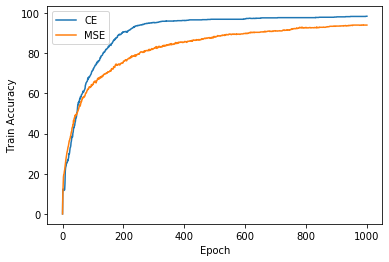

In [138]:
plt.plot(ce_metrics[:,0], label="CE")
plt.plot(mse_metrics[:,0], label="MSE")
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.legend()

plt.show()

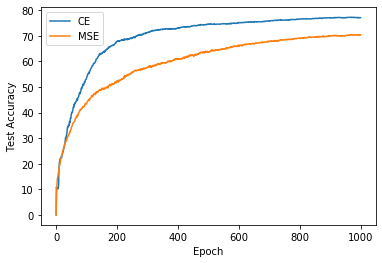

In [110]:
plt.plot(ce_metrics[:,1], label="CE")
plt.plot(mse_metrics[:,1], label="MSE")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

Cross entropy converges faster than MSE, as shown by the steeper curve. It also providers a higher accuracy, both in training and test. This is because CE is better suited for a classification task such as MNIST, while MSE is more meant for regression tasks. One of the main reasons for this is that CE heavily penalizes incorrect guesses of the target, while MSE does not. This is what we want in a classification task, as we either have the right target class or not. However, in a regression problem, the answer may be close along the range of values we are predicting on. Moreover, the CE models the error as drawn from a multinomial distribution, as opposed to the Normal distribution modeled by MSE. 

## Compare Regularization

### L1 Regularization

In [111]:
from prob4 import * 

In [112]:
loss = torch.nn.CrossEntropyLoss()
l1_001_metrics, l1_001_model = train(trainloader, train_data, train_labels, test_data, test_labels, 
      num_epochs, num_input, num_classes, learning_rate, loss, regularization="l1", reg_lambda=0.001)

train acc: 10.100000000000001	 test acc: 9.2	 at epoch: 0
train acc: 79.2	 test acc: 62.64999999999999	 at epoch: 100
train acc: 93.89999999999999	 test acc: 75.35	 at epoch: 200
train acc: 96.7	 test acc: 77.4	 at epoch: 300
train acc: 97.5	 test acc: 77.85	 at epoch: 400
train acc: 97.8	 test acc: 78.5	 at epoch: 500
train acc: 98.2	 test acc: 78.64999999999999	 at epoch: 600
train acc: 98.2	 test acc: 78.7	 at epoch: 700
train acc: 98.5	 test acc: 78.85	 at epoch: 800
train acc: 98.8	 test acc: 79.05	 at epoch: 900


In [113]:
loss = torch.nn.CrossEntropyLoss()
l1_005_metrics, l1_005_model = train(trainloader, train_data, train_labels, test_data, test_labels, 
      num_epochs, num_input, num_classes, learning_rate, loss, regularization="l1", reg_lambda=0.005)

train acc: 11.899999999999999	 test acc: 13.100000000000001	 at epoch: 0
train acc: 71.8	 test acc: 56.99999999999999	 at epoch: 100
train acc: 91.3	 test acc: 70.1	 at epoch: 200
train acc: 95.6	 test acc: 75.0	 at epoch: 300
train acc: 97.0	 test acc: 76.1	 at epoch: 400
train acc: 97.39999999999999	 test acc: 76.7	 at epoch: 500
train acc: 97.7	 test acc: 77.45	 at epoch: 600
train acc: 97.89999999999999	 test acc: 77.9	 at epoch: 700
train acc: 98.1	 test acc: 78.0	 at epoch: 800
train acc: 98.1	 test acc: 78.35	 at epoch: 900


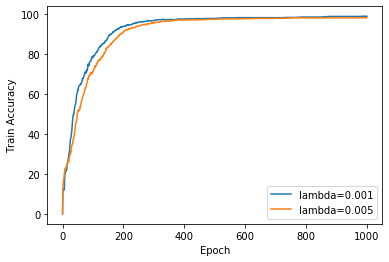

In [122]:
plt.plot(l1_001_metrics[:,0], label="lambda=0.001")
plt.plot(l1_005_metrics[:,0], label="lambda=0.005")
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.legend()
plt.show()

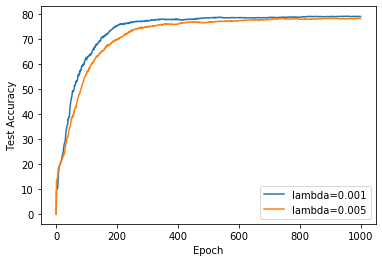

In [123]:
plt.plot(l1_001_metrics[:,1], label="lambda=0.001")
plt.plot(l1_005_metrics[:,1], label="lambda=0.005")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

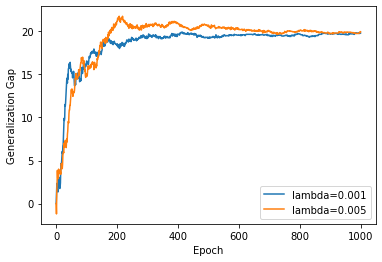

In [124]:
plt.plot(l1_001_metrics[:,0]-l1_001_metrics[:,1], label="lambda=0.001")
plt.plot(l1_005_metrics[:,0]-l1_005_metrics[:,1], label="lambda=0.005")
plt.xlabel("Epoch")
plt.ylabel("Generalization Gap")
plt.legend()
plt.show()

### L2 Regularization

In [114]:
from prob4 import * 

In [115]:
loss = torch.nn.CrossEntropyLoss()
l2_001_metrics, l2_001_model = train(trainloader, train_data, train_labels, test_data, test_labels, 
      num_epochs, num_input, num_classes, learning_rate, loss, regularization="l2", reg_lambda=0.001)

train acc: 10.0	 test acc: 9.5	 at epoch: 0
train acc: 71.0	 test acc: 55.35	 at epoch: 100
train acc: 91.8	 test acc: 70.6	 at epoch: 200
train acc: 95.6	 test acc: 74.45	 at epoch: 300
train acc: 96.8	 test acc: 75.64999999999999	 at epoch: 400
train acc: 97.8	 test acc: 76.55	 at epoch: 500
train acc: 98.5	 test acc: 76.8	 at epoch: 600
train acc: 98.6	 test acc: 77.0	 at epoch: 700
train acc: 98.8	 test acc: 77.60000000000001	 at epoch: 800
train acc: 98.9	 test acc: 77.75	 at epoch: 900


In [117]:
loss = torch.nn.CrossEntropyLoss()
l2_01_metrics, l2_01_model = train(trainloader, train_data, train_labels, test_data, test_labels, 
      num_epochs, num_input, num_classes, learning_rate, loss, regularization="l2", reg_lambda=0.01)

train acc: 10.9	 test acc: 10.75	 at epoch: 0
train acc: 69.1	 test acc: 54.6	 at epoch: 100
train acc: 89.60000000000001	 test acc: 69.6	 at epoch: 200
train acc: 95.39999999999999	 test acc: 74.9	 at epoch: 300
train acc: 96.6	 test acc: 75.8	 at epoch: 400
train acc: 97.1	 test acc: 77.05	 at epoch: 500
train acc: 97.5	 test acc: 77.35	 at epoch: 600
train acc: 97.8	 test acc: 77.7	 at epoch: 700
train acc: 97.8	 test acc: 78.2	 at epoch: 800
train acc: 98.2	 test acc: 78.10000000000001	 at epoch: 900


In [118]:
loss = torch.nn.CrossEntropyLoss()
l2_1_metrics, l2_1_model = train(trainloader, train_data, train_labels, test_data, test_labels, 
      num_epochs, num_input, num_classes, learning_rate, loss, regularization="l2", reg_lambda=0.1)

train acc: 11.799999999999999	 test acc: 11.85	 at epoch: 0
train acc: 70.7	 test acc: 52.5	 at epoch: 100
train acc: 91.60000000000001	 test acc: 71.95	 at epoch: 200
train acc: 96.0	 test acc: 76.05	 at epoch: 300
train acc: 96.8	 test acc: 76.8	 at epoch: 400
train acc: 97.5	 test acc: 77.0	 at epoch: 500
train acc: 98.0	 test acc: 77.0	 at epoch: 600
train acc: 98.0	 test acc: 76.85	 at epoch: 700
train acc: 98.3	 test acc: 77.55	 at epoch: 800
train acc: 98.6	 test acc: 77.85	 at epoch: 900


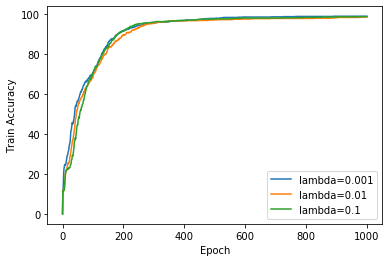

In [126]:
plt.plot(l2_001_metrics[:,0], label="lambda=0.001")
plt.plot(l2_01_metrics[:,0], label="lambda=0.01")
plt.plot(l2_1_metrics[:,0], label="lambda=0.1")
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.legend()
plt.show()

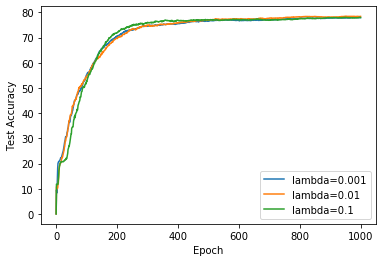

In [127]:
plt.plot(l2_001_metrics[:,1], label="lambda=0.001")
plt.plot(l2_01_metrics[:,1], label="lambda=0.01")
plt.plot(l2_1_metrics[:,1], label="lambda=0.1")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

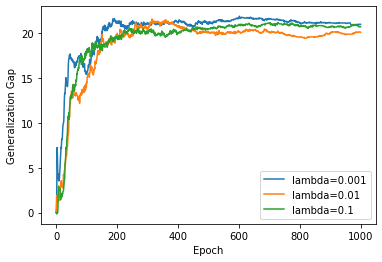

In [125]:
plt.plot(l2_001_metrics[:,0]-l2_001_metrics[:,1], label="lambda=0.001")
plt.plot(l2_01_metrics[:,0]-l2_01_metrics[:,1], label="lambda=0.01")
plt.plot(l2_1_metrics[:,0]-l2_1_metrics[:,1], label="lambda=0.1")
plt.xlabel("Epoch")
plt.ylabel("Generalization Gap")
plt.legend()
plt.show()

### Dropout

In [129]:
loss = torch.nn.CrossEntropyLoss()
dropout_05_metrics, dropout_05_model = train(trainloader, train_data, train_labels, test_data, test_labels, 
      num_epochs, num_input, num_classes, learning_rate, loss, dropout_p=0.05)

train acc: 11.0	 test acc: 10.549999999999999	 at epoch: 0
train acc: 69.5	 test acc: 54.75	 at epoch: 100
train acc: 90.8	 test acc: 70.8	 at epoch: 200
train acc: 95.19999999999999	 test acc: 73.8	 at epoch: 300
train acc: 96.2	 test acc: 75.55	 at epoch: 400
train acc: 96.8	 test acc: 77.60000000000001	 at epoch: 500
train acc: 97.2	 test acc: 77.2	 at epoch: 600
train acc: 97.89999999999999	 test acc: 77.8	 at epoch: 700
train acc: 97.7	 test acc: 77.14999999999999	 at epoch: 800
train acc: 98.1	 test acc: 77.5	 at epoch: 900


In [130]:
loss = torch.nn.CrossEntropyLoss()
dropout_1_metrics, dropout_1_model = train(trainloader, train_data, train_labels, test_data, test_labels, 
      num_epochs, num_input, num_classes, learning_rate, loss, dropout_p=0.1)

train acc: 10.0	 test acc: 8.85	 at epoch: 0
train acc: 66.4	 test acc: 52.1	 at epoch: 100
train acc: 87.7	 test acc: 67.30000000000001	 at epoch: 200
train acc: 93.30000000000001	 test acc: 72.65	 at epoch: 300
train acc: 96.1	 test acc: 74.45	 at epoch: 400
train acc: 96.2	 test acc: 75.05	 at epoch: 500
train acc: 96.1	 test acc: 76.6	 at epoch: 600
train acc: 97.1	 test acc: 75.94999999999999	 at epoch: 700
train acc: 97.0	 test acc: 76.1	 at epoch: 800
train acc: 97.3	 test acc: 77.64999999999999	 at epoch: 900


In [131]:
loss = torch.nn.CrossEntropyLoss()
dropout_5_metrics, dropout_5_model = train(trainloader, train_data, train_labels, test_data, test_labels, 
      num_epochs, num_input, num_classes, learning_rate, loss, dropout_p=0.5)

train acc: 10.0	 test acc: 9.9	 at epoch: 0
train acc: 40.699999999999996	 test acc: 32.4	 at epoch: 100
train acc: 66.4	 test acc: 49.95	 at epoch: 200
train acc: 76.3	 test acc: 60.650000000000006	 at epoch: 300
train acc: 83.5	 test acc: 65.0	 at epoch: 400
train acc: 87.5	 test acc: 66.7	 at epoch: 500
train acc: 90.9	 test acc: 68.95	 at epoch: 600
train acc: 91.7	 test acc: 68.89999999999999	 at epoch: 700
train acc: 91.5	 test acc: 69.35	 at epoch: 800
train acc: 91.3	 test acc: 71.2	 at epoch: 900


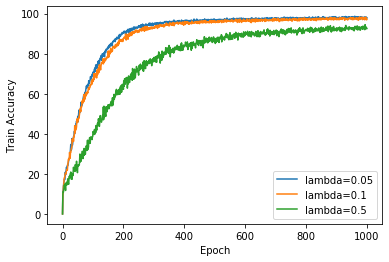

In [133]:
plt.plot(dropout_05_metrics[:,0], label="lambda=0.05")
plt.plot(dropout_1_metrics[:,0], label="lambda=0.1")
plt.plot(dropout_5_metrics[:,0], label="lambda=0.5")
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.legend()
plt.show()

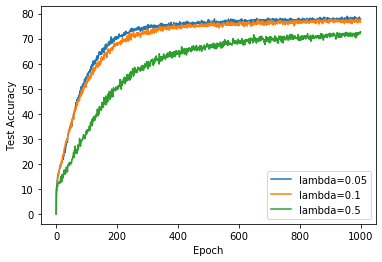

In [134]:
plt.plot(dropout_05_metrics[:,1], label="lambda=0.05")
plt.plot(dropout_1_metrics[:,1], label="lambda=0.1")
plt.plot(dropout_5_metrics[:,1], label="lambda=0.5")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

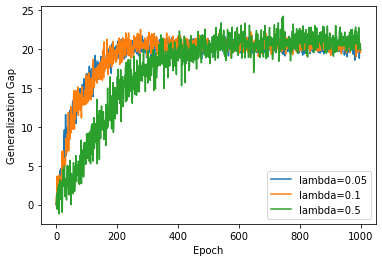

In [136]:
plt.plot(dropout_05_metrics[:,0]-dropout_05_metrics[:,1], label="lambda=0.05")
plt.plot(dropout_1_metrics[:,0]-dropout_1_metrics[:,1], label="lambda=0.1")
plt.plot(dropout_5_metrics[:,0]-dropout_5_metrics[:,1], label="lambda=0.5")
plt.xlabel("Epoch")
plt.ylabel("Generalization Gap")
plt.legend()
plt.show()

### Plot Loss Data

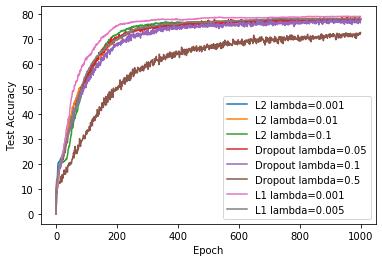

In [137]:
plt.plot(l2_001_metrics[:,1], label="L2 lambda=0.001")
plt.plot(l2_01_metrics[:,1], label="L2 lambda=0.01")
plt.plot(l2_1_metrics[:,1], label="L2 lambda=0.1")

plt.plot(dropout_05_metrics[:,1], label="Dropout lambda=0.05")
plt.plot(dropout_1_metrics[:,1], label="Dropout lambda=0.1")
plt.plot(dropout_5_metrics[:,1], label="Dropout lambda=0.5")

plt.plot(l1_001_metrics[:,1], label="L1 lambda=0.001")
plt.plot(l1_005_metrics[:,1], label="L1 lambda=0.005")

plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

Generally speaking, there does seem to be sensitivity to the regularization methods, that either increase or decrease the accuracy beyond the unregularized values. Specifically, L2 regularization seems to have little effect, regardless of the lambda chosen. This may be due to the fact that small weights have a relatively minimal impact with such a small network. However, sparsifying the model by dropping neurons does seem to help, which suggests that the model may be overparameterized with too many neurons. Finally, we validate our results by showing that if 50% of our nodes are dropped out, then we have the worst accuracy of all our models. This suggests that at least half our neurons are learning useful information for classification. 